In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm

In [16]:
df_GM = pd.read_csv(r"C:\Users\ibast\GM_STOCK.CSV")
df_GM.head(5)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-01-02,33.810001,32.410000,32.849998,33.639999,7662300.0,31.893360
1,2019-01-03,33.680000,32.200001,33.340000,32.250000,11618300.0,30.575531
2,2019-01-04,33.570000,32.430000,32.799999,33.330002,10784000.0,31.599459
3,2019-01-07,34.970001,33.480000,33.709999,34.360001,10722300.0,32.575977
4,2019-01-08,35.680000,34.490002,35.000000,34.810001,10532900.0,33.002613


In [25]:
def movingaverage(x):
    y = x[:4]
    m = x[5:]
    d = datetime.strptime("{0} {1} {2} 00:00:00".format(y,m,'01'), "%Y %m %d %H:%M:%S")
    return d
df_GM['Adj Close'] = df_GM['Close'].apply(movingaverage)

df_GM.index= df_GM['Adj Close']
df_GM.drop(['Close','Adj Close'],axis=1,inplace=True)
df_GM.head(6)

TypeError: 'float' object is not subscriptable

# Simple Moving Average

In [18]:
df_GM['06m-SMA']=df['Adj Close'].rolling(window=6).mean()
df_GM['12m-SMA']=df['Adj Close'].rolling(window=12).mean()
df_GM['24m-SMA']=df['Adj Close'].rolling(window=24).mean()

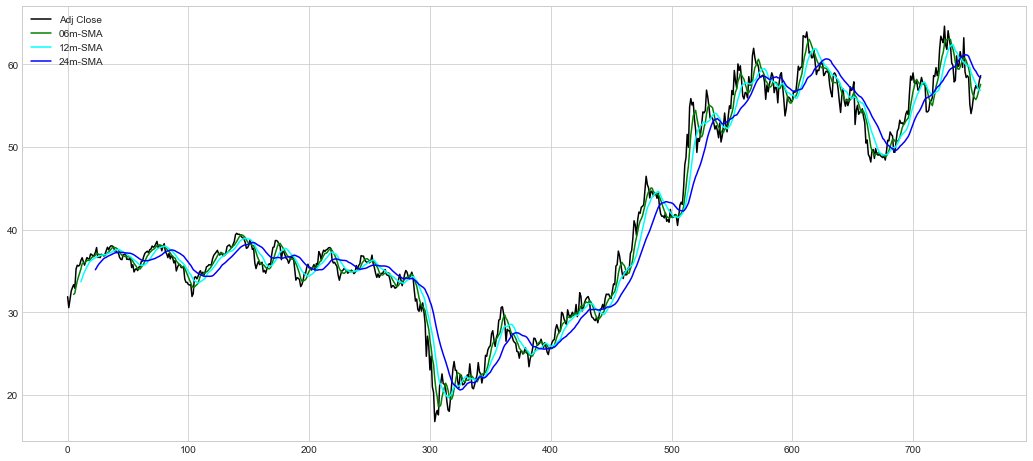

In [24]:
df_GM['Adj Close'].plot(color='black', figsize=(18,8),label='Adj Close')
df_GM['06m-SMA'].plot(color='green',label='06m-SMA')
df_GM['12m-SMA'].plot(color='cyan',label='12m-SMA')
df_GM['24m-SMA'].plot(color='blue',label='24m-SMA')
plt.legend()

# #Exponentially Weighted Moving Average

In [20]:
df_GM['06m-EWMA']=df['Adj Close'].ewm(span=6).mean()
df_GM['12m-EWMA']=df['Adj Close'].ewm(span=12).mean()
df_GM['24m-EWMA']=df['Adj Close'].ewm(span=24).mean()

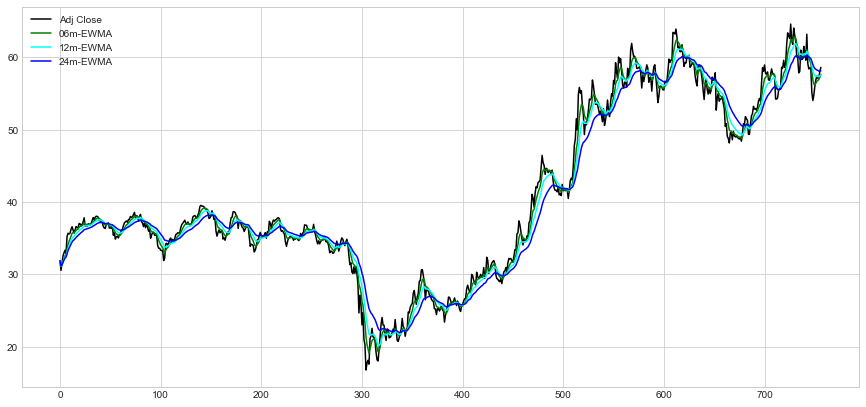

In [23]:
df_GM['Adj Close'].plot(color='black', figsize=(15,7),label='Adj Close')
df_GM['06m-EWMA'].plot(color='green',label='06m-EWMA')
df_GM['12m-EWMA'].plot(color='cyan',label='12m-EWMA')
df_GM['24m-EWMA'].plot(color='blue',label='24m-EWMA')
plt.legend()